# Events Voting Tool Demo

The purpose of this demo notebook is to demonstrate the capabilities of the the `event_tools` API written as part of the "Introduction to Programming" Group project assignment. 

The code provided currently consists of three main classes: 
- `User()` class: Keeps basic user information (name, uuid, etc.) and allows to track which users attend which events
- `Event()` class: Keeps the metadata of the events as well as information on user attendance
- `Page()` class: A high-level wrapper class which keeps track of all users and events in the system

Using class methods of these classes, the API currently supports the following interactions: 
- Adding an event
- Deleting an event
- Adding users to the user database of the page
- Inviting people to an event
- Allowing people to decide whether to attend or not

### API Imports

In [1]:
# enable autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
from event_tools import Page, User, Event
from random import choice
from geopy.geocoders import Nominatim


## Page & Event initialization

### Initializing Page

In [3]:
# note that initializing the page already creates a basic number of events
page = Page()

In [4]:
# get info about all users of the page
users = page.get_users()
page.get_user_information()

********************************
User Name Chris Kamara
User ID: 7fb89bd9-00ce-4c1b-bd40-0b751de1ba0e
Gender: male
Events hosted: []
Events invited: []
Events attending: []
Events maybe attending: []
********************************
********************************
User Name Lionel Messi
User ID: ff7ad3eb-df9f-451b-9034-ca144273a0c4
Gender: male
Events hosted: []
Events invited: []
Events attending: []
Events maybe attending: []
********************************
********************************
User Name Jan Frodeno
User ID: a91463f2-bd53-41c8-babe-1fbf2c3bc764
Gender: male
Events hosted: []
Events invited: []
Events attending: []
Events maybe attending: []
********************************
********************************
User Name Heiko Westermann
User ID: c9e485f1-76f9-40ad-ab6a-4a7041994771
Gender: male
Events hosted: []
Events invited: []
Events attending: []
Events maybe attending: []
********************************
********************************
User Name Serena Williams
User I

### Adding an event

In [5]:
host = users[0]
host.get_info()

********************************
User Name Chris Kamara
User ID: 7fb89bd9-00ce-4c1b-bd40-0b751de1ba0e
Gender: male
Events hosted: []
Events invited: []
Events attending: []
Events maybe attending: []
********************************


In [6]:
sports_gala = Event(
    host=host, 
    name="Sports Gala", 
    start_date="01/01/2021 20:00", 
    end_date="02/01/2021 02:00", 
    description="Annual election to the sportsperson of the year", 
    location="o2 World Berlin")

In [7]:
football_gala = Event(
    host=host, 
    name="Footbball Gala", 
    start_date="05/02/2021 21:00", 
    end_date="06/02/2021 21:00", 
    description="Footballer of the year election", 
    location="Royal Albert Hall"
)

In [8]:
# we should see that the host information has been update accordingly
host.get_info()

********************************
User Name Chris Kamara
User ID: 7fb89bd9-00ce-4c1b-bd40-0b751de1ba0e
Gender: male
Events hosted: ['Sports Gala', 'Footbball Gala']
Events invited: []
Events attending: ['Sports Gala', 'Footbball Gala']
Events maybe attending: []
********************************


## Inviting users
Only the host is able to invite users to his own events

In [9]:
# host invites all users on the page (apart from himself)
sports_guest_list = [user for user in page.get_users() if user.name != host.name]
sports_gala.invite_users(host, sports_guest_list)

In [10]:
# for the footballing gala, we only want to invited footballers
footballers = ["Lionel Messi", "Heiko Westermann", "Marta", "Alex Morgan"]
football_guest_list = [user for user in page.get_users() if user.name in footballers]

In [11]:
football_gala.invite_users(host, football_guest_list)

In [12]:
page.events += [football_gala, sports_gala]

We can now see that all sportspeople are invited to the sports gala, but only the footballers to the football gala when we view the page stats

In [13]:
page.get_user_information()

********************************
User Name Chris Kamara
User ID: 7fb89bd9-00ce-4c1b-bd40-0b751de1ba0e
Gender: male
Events hosted: ['Sports Gala', 'Footbball Gala']
Events invited: []
Events attending: ['Sports Gala', 'Footbball Gala']
Events maybe attending: []
********************************
********************************
User Name Lionel Messi
User ID: ff7ad3eb-df9f-451b-9034-ca144273a0c4
Gender: male
Events hosted: []
Events invited: ['Sports Gala', 'Footbball Gala']
Events attending: []
Events maybe attending: []
********************************
********************************
User Name Jan Frodeno
User ID: a91463f2-bd53-41c8-babe-1fbf2c3bc764
Gender: male
Events hosted: []
Events invited: ['Sports Gala']
Events attending: []
Events maybe attending: []
********************************
********************************
User Name Heiko Westermann
User ID: c9e485f1-76f9-40ad-ab6a-4a7041994771
Gender: male
Events hosted: []
Events invited: ['Sports Gala', 'Footbball Gala']
Events at

In [14]:
page.get_event_information()

*********************
Event Name: Footbball Gala
Host: Chris Kamara
Start Date: 2021-05-02 21:00:00
End Date: 2021-06-02 21:00:00
Location: Royal Albert Hall
Description: Footballer of the year election
Event UUID: 6eb5e0c6-e40c-4623-8f92-19669cfd4ae2
Invited: ['Lionel Messi', 'Heiko Westermann', 'Marta', 'Alex Morgan']
Confirmed: []
Maybe: []
Declined: []
*********************
*********************
Event Name: Sports Gala
Host: Chris Kamara
Start Date: 2021-01-01 20:00:00
End Date: 2021-02-01 02:00:00
Location: o2 World Berlin
Description: Annual election to the sportsperson of the year
Event UUID: 71b5efe9-52ed-405e-8b05-2862542cdef4
Invited: ['Lionel Messi', 'Jan Frodeno', 'Heiko Westermann', 'Serena Williams', 'Marta', 'Alex Morgan']
Confirmed: []
Maybe: []
Declined: []
*********************


In [15]:
football_gala.get_info()

*********************
Event Name: Footbball Gala
Host: Chris Kamara
Start Date: 2021-05-02 21:00:00
End Date: 2021-06-02 21:00:00
Location: Royal Albert Hall
Description: Footballer of the year election
Event UUID: 6eb5e0c6-e40c-4623-8f92-19669cfd4ae2
Invited: ['Lionel Messi', 'Heiko Westermann', 'Marta', 'Alex Morgan']
Confirmed: []
Maybe: []
Declined: []
*********************


In [16]:
sports_gala.get_info()

*********************
Event Name: Sports Gala
Host: Chris Kamara
Start Date: 2021-01-01 20:00:00
End Date: 2021-02-01 02:00:00
Location: o2 World Berlin
Description: Annual election to the sportsperson of the year
Event UUID: 71b5efe9-52ed-405e-8b05-2862542cdef4
Invited: ['Lionel Messi', 'Jan Frodeno', 'Heiko Westermann', 'Serena Williams', 'Marta', 'Alex Morgan']
Confirmed: []
Maybe: []
Declined: []
*********************


## Responding to invites

For demo purposes, let's generate some random reponses to the events

In [17]:
response_options = ["attending", "maybe", "decline"]

Respond to sports gala

In [18]:
# Let's generate some random responses to the events
event = sports_gala
for user in event.invited: 
    response = choice(response_options)
    if response == "attending": 
        user.attend(event.uuid)
    elif response == "maybe": 
        user.maybe(event.uuid)
    else: 
        user.decline(event.uuid)

Lionel Messi is has declined Sports Gala
Jan Frodeno is maybe attending Sports Gala
Heiko Westermann is maybe attending Sports Gala
Serena Williams is has declined Sports Gala
Marta is attending Sports Gala
Alex Morgan is attending Sports Gala


In [19]:
event = football_gala
for user in event.invited: 
    response = choice(response_options)
    if response == "attending": 
        user.attend(event.uuid)
    elif response == "maybe": 
        user.maybe(event.uuid)
    else: 
        user.decline(event.uuid)

Lionel Messi is maybe attending Footbball Gala
Heiko Westermann is attending Footbball Gala
Marta is attending Footbball Gala
Alex Morgan is attending Footbball Gala


In [20]:
page.get_event_information()

*********************
Event Name: Footbball Gala
Host: Chris Kamara
Start Date: 2021-05-02 21:00:00
End Date: 2021-06-02 21:00:00
Location: Royal Albert Hall
Description: Footballer of the year election
Event UUID: 6eb5e0c6-e40c-4623-8f92-19669cfd4ae2
Invited: ['Lionel Messi', 'Heiko Westermann', 'Marta', 'Alex Morgan']
Confirmed: ['Heiko Westermann', 'Marta', 'Alex Morgan']
Maybe: ['Lionel Messi']
Declined: []
*********************
*********************
Event Name: Sports Gala
Host: Chris Kamara
Start Date: 2021-01-01 20:00:00
End Date: 2021-02-01 02:00:00
Location: o2 World Berlin
Description: Annual election to the sportsperson of the year
Event UUID: 71b5efe9-52ed-405e-8b05-2862542cdef4
Invited: ['Lionel Messi', 'Jan Frodeno', 'Heiko Westermann', 'Serena Williams', 'Marta', 'Alex Morgan']
Confirmed: ['Marta', 'Alex Morgan']
Maybe: ['Jan Frodeno', 'Heiko Westermann']
Declined: ['Lionel Messi', 'Serena Williams']
*********************


In [21]:
# Print current state of page to users.csv and events.csv

## Printing event stats

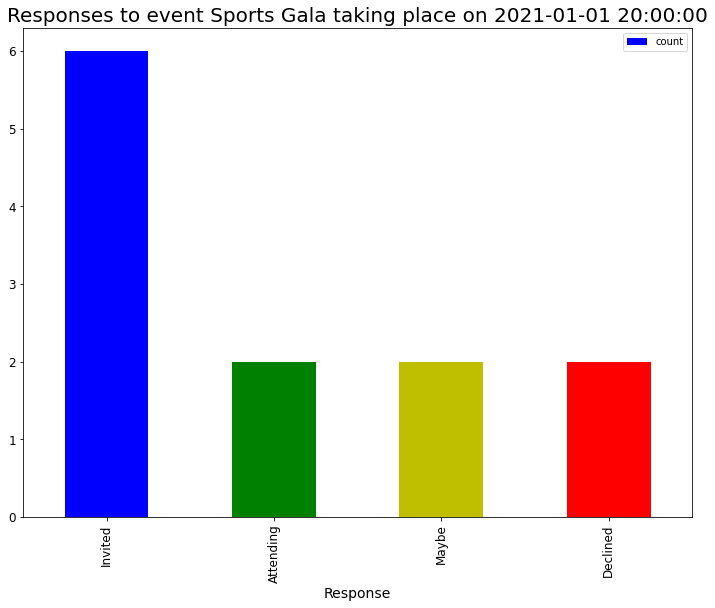

In [22]:
sports_gala.get_response_stats()

In [23]:
sports_gala.countdown()

Countdown to Sports Gala: 236 days...


## Getting geolocation information

In [39]:
sports_gala.get_directions()

Full Address of the event venue:
1, Mercedes-Platz, Friedrichshain, Friedrichshain-Kreuzberg, Berlin, 10243, Deutschland


In [40]:
football_gala.get_directions()

Full Address of the event venue:
Royal Albert Hall, Kensington Gore, Knightsbridge, City of Westminster, London, Greater London, England, SW7 2AP, United Kingdom
